In [8]:
import cair_maze
import gymnasium as gym

env = gym.make("cair_maze:MazeEnv-v0", render_mode="jupyter")

In [2]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

def render():
    clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()

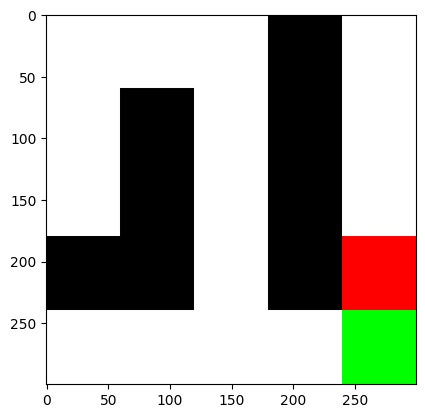

({'agent': array([4, 3]), 'target': array([4, 4])}, {'distance': 1.0})

In [9]:
env.reset()

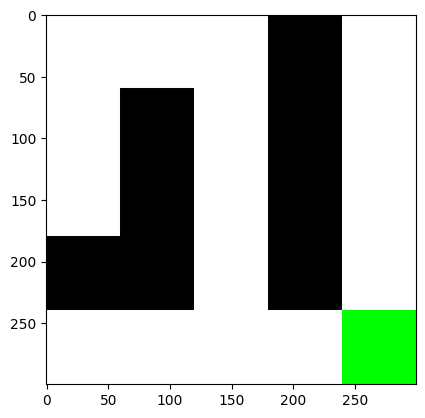

({'agent': array([4, 4]), 'target': array([4, 4])},
 1,
 True,
 False,
 {'distance': 0.0})

In [16]:
env.step(1)